# Required packages

In [10]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input data

In [19]:
# Input data
data = {
    "full":"../Results/WP2/human_geuvadis_simulated_5sets/full/norm1/NoConstr/human_geuvadis_simulated_5sets_full_full_norm1_noconstr_transcripts.gtf", 
    "full-norm2":"../Results/WP2/human_geuvadis_simulated_5sets/full/norm1/constr0/human_geuvadis_simulated_5sets_full_norm1_constr0__transcripts.gtf",
    "full-norm2-constr1":"human_geuvadis_simulated_5sets_wp2_norm2_constr1_2_5.gtf"}
df_dict = {}
for id, file in data.items():
    df = pd.DataFrame()
    df = pd.read_csv(file, sep="\t", names=["seqname","source","feature","start","end","score","strand","frame","attribute"])
    df_dict[id] = df

      seqname         source     feature   start     end  score strand frame  \
0  GL000008.2  FortgMethoden  transcript  179629  181352      0      -     .   
1  GL000008.2  FortgMethoden        exon  179629  179806      0      -     .   
2  GL000008.2  FortgMethoden        exon  181193  181352      0      -     .   
3  GL000194.1  FortgMethoden  transcript   53590   55310      0      -     .   
4  GL000194.1  FortgMethoden        exon   53590   55310      0      -     .   

                                           attribute  
0  gene_id "Gene0"; transcript_id "0.1";Expressio...  
1              gene_id "Gene0"; transcript_id "0.1";  
2              gene_id "Gene0"; transcript_id "0.1";  
3  gene_id "Gene1"; transcript_id "1.1";Expressio...  
4              gene_id "Gene1"; transcript_id "1.1";  
      seqname         source     feature   start     end  score strand frame  \
0  GL000008.2  FortgMethoden  transcript  179629  181352      0      -     .   
1  GL000008.2  FortgMethoden 

# Number of transcripts

In [21]:
# Extract Transcript Data
transcripts_dict = {}
for id, frame in df_dict.items():
    df_transcripts = frame[frame["feature"] == "transcript"]
    print(id + ": " + str(df_transcripts.shape[0]))
    transcripts_dict[id] = df_transcripts

full: 40372
full-norm2: 35198
full-norm2-constr1: 26185


# Number of single exon transcripts

In [40]:
for id, frame in df_dict.items():
    count_single_exons = 0
    bool1 = False
    bool2 = False
    for index, line in frame.iterrows():
        if line["feature"] == "exon" and bool1 == True:
            bool2 = True
            bool1 = False
        elif line["feature"] == "transcript" and bool2 == True:
            count_single_exons += 1
            bool2 = False
            bool1 = False
        elif line["feature"] == "transcript":
            bool1 = True
        else:
            bool2 = False
    if bool2 == True:
        count_single_exons += 1

    print(id + ": " + str(count_single_exons))

full: 216
full-norm2: 200
full-norm2-constr1: 110


# Number of transcripts per gene

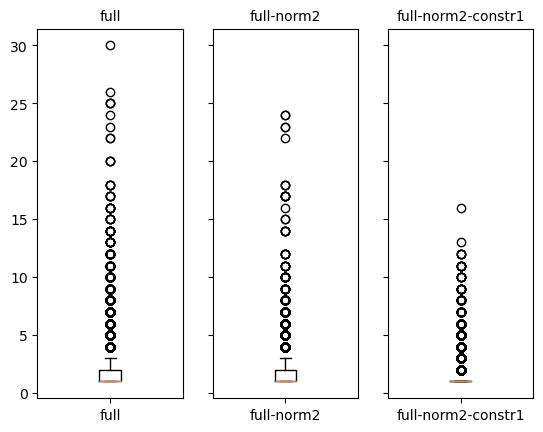

In [15]:
# Transcripts per gene
fig, axs = plt.subplots(1, len(df_dict), sharey=True)
count = 0
for id, frame in transcripts_dict.items():
    no_trans_per_gene = []
    gene = 0
    transcripts = 0
    for index, line in frame.iterrows():
        current_gene = line["attribute"].split(";")[0][13:-1]
        if current_gene == str(gene):
            transcripts += 1
        else:
            gene = current_gene
            no_trans_per_gene.append(transcripts)
            transcripts = 1
    no_trans_per_gene.append(transcripts)
    no_genes = len(no_trans_per_gene)
    df_vis = pd.DataFrame.from_dict({"Gene": list(range(no_genes)), "Number of transcripts": no_trans_per_gene})
    #sns.violinplot(ax=axs[count], x=df_vis["Number of transcripts"])
    #sns.violinplot(ax=axs[count], x=df_vis[df_vis["Number of transcripts"] < 50][df_vis["Number of transcripts"] > 2]["Number of transcripts"])
    axs[count].set_title(id, fontsize=10)
    #sns.boxplot(ax=axs[count], x=df_vis["Number of transcripts"])
    axs[count].boxplot(x=df_vis["Number of transcripts"], labels=[id])
    #axs[count].set_yscale('log')
    count += 1
#axs[0].set_ylim(-1,500)


# Number of Exons

In [31]:
# Extract Transcript Data
exons_dict = {}
for id, frame in df_dict.items():
    df_exons = frame[frame["feature"] == "exon"]
    print(id + ": " + str(df_exons.shape[0]))
    df_exons.reset_index(drop=True, inplace=True)
    exons_dict[id] = df_exons

full: 357223
full-norm2: 309756
full-norm2-constr1: 221395


# Number of exons per transcript

In [41]:
# Save the number of exons per transcript in a dataframe for each file
exons_dict2 = {}
for id, frame in exons_dict.items():
    single_exon_trans = 0
    no_exons_per_transcript = []
    
    for index, line in frame.iterrows():
        current_transcript = line["attribute"].split(";")[1][18:-1]
        current_gene = line["attribute"].split(";")[0][13:-1]
        if index == 0:
            transcript = current_transcript
            gene = current_gene
            exons = 1
        elif current_transcript == str(transcript) and current_gene == str(gene):
            exons += 1
        else:
            transcript = current_transcript
            gene = current_gene
            no_exons_per_transcript.append(exons)
            if exons == 1:
                count += 1
            exons = 1
    no_exons_per_transcript.append(exons)
    if exons == 1:
        count += 1
    no_transcripts = len(no_exons_per_transcript)
    #print(gene)
    #print(transcript)
    print(id + ": " + str(no_transcripts))
    print(id + ": " + str(single_exon_trans))
    df_vis2 = pd.DataFrame.from_dict({"Transcript": list(range(no_transcripts)), "Number of exons": no_exons_per_transcript})
    exons_dict2[id] = df_vis2

Yes
full: 40372
217
Yes
full-norm2: 35198
201
Yes
full-norm2-constr1: 26185
110


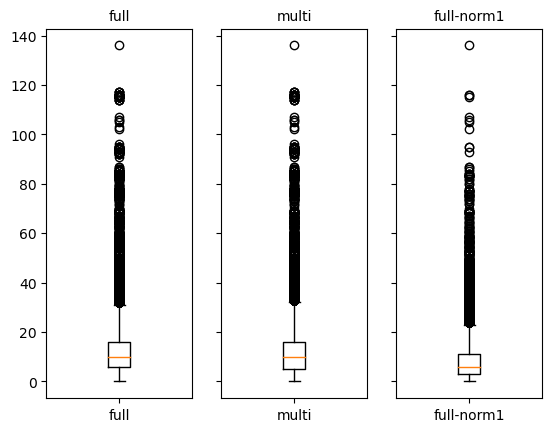

In [39]:
# Visualisation
fig, axs = plt.subplots(1, len(df_dict), sharey=True)
count = 0
for id, frame in exons_dict2.items():
    #sns.violinplot(ax=axs[count], x=df_vis["Number of exons"])
    #sns.violinplot(ax=axs[count], x=df_vis[df_vis["Number of exons"] < 50][df_vis["Number of exons"] > 2]["Number of exons"])
    axs[count].set_title(id, fontsize=10)
    #sns.boxplot(ax=axs[count], x=df_vis["Number of exons"])
    axs[count].boxplot(x=frame["Number of exons"], labels=[id])
    count += 1